## Juego de la vida de Conway

El juego de la vida tiene su origen en el año de 1970 en la revista Scientific American; debido a la gran variedad que presentan la evolución de sus patrones este a adquirido una gran cantidad de atención dado que esta es equivalente a una maquina universal de Turing dado que todo lo que se puede computar algorítmicamente se puede computar en el juego de la vida. 

## Reglas del juego

Se trata de un juego de cero jugadores dado que el progreso o evolución del juego viene dado por un patron inicial el cual no requiere la intervención posterior de la persona. Ademas consta de un tablero en el cual cada celda representa una célula las cuales pueden estar en uno de dos posibles estados "vivas" o "muertas"; una célula puede ir intercambiando su estado en cada turno durante el progreso del juego, las células constan de las siguientes reglas para actuar:

* Una célula muerta con exactamente 3 células vecinas vivas "nace" (es decir, al turno siguiente estará viva).
* Una célula viva con 2 o 3 células vecinas vivas sigue viva, en otro caso muere (por "soledad" o "superpoblación").



Aquí tenemos un pequeño ejemplo en python de nuestro algoritmo para el juego de la vida:

In [1]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt


class Game(object):

    def __init__(self, state, infinite_board = True):

        self.state = state
        self.width = state.width
        self.height = state.height
        self.infinite_board = infinite_board

    def step(self, count = 1):
        total_vivas = {}
        idx = 0
        for generation in range(count):
            print('Generacion:', generation)
            new_board = [[False] * self.width for row in range(self.height)]
            vivas = 0
            muertas = 0
            for y, row in enumerate(self.state.board):
                for x, cell in enumerate(row):
                    neighbours = self.neighbours(x, y)
                    previous_state = self.state.board[y][x]
                    should_live = neighbours == 3 or (neighbours == 2 and previous_state == True)
                    new_board[y][x] = should_live
                    if cell:
                    	vivas += 1
                    else:
                    	muertas +=1
            total_vivas[idx] = vivas
            idx += 1
            print('vivas:', vivas, 'muertas:', muertas)
                    

            self.state.board = new_board
            total = []
            generaciones = []
            for i in total_vivas:
            	total.append(total_vivas[i])
            	generaciones.append(i)
            print(self.display())
            print('Celulas por generacion:',total_vivas)
            print('Total de celulas que han vivido:', np.sum(total))
            print('Generacion con mas celulas vivas:', np.argmax(total), ':', np.amax(total))
            print('Generacion con menos celulas vivas:', np.argmin(total), ':', np.amin(total))
            print('Promedio de celulas vivas por generacion:', np.mean(total))
            if generation >= count - 1:
            	self.graficar(generaciones, total)
            

    def neighbours(self, x, y):

        count = 0

        for hor in [-1, 0, 1]:
            for ver in [-1, 0, 1]:
                if not hor == ver == 0 and (self.infinite_board == True or (0 <= x + hor < self.width and 0 <= y + ver < self.height)):
                    count += self.state.board[(y + ver) % self.height][(x + hor) % self.width]

        return count

    def display(self):
        return self.state.display()

    def graficar(self, generaciones, celulas):
        objects = generaciones
        y_pos = np.arange(len(objects))
        x_pos = celulas

        plt.bar(y_pos, x_pos, align='center', alpha=0.5)
        plt.xticks(y_pos, objects)
        plt.ylabel('Celulas')
        plt.title('Juego de la vida')

        plt.show()
    
class State(object):

    def __init__(self, positions, x, y, width, height):

        active_cells = []

        for y, row in enumerate(positions.splitlines()):
            for x, cell in enumerate(row.strip()):
                if cell == 'o':
                    active_cells.append((x,y))

        board = [[False] * width for row in range(height)]

        for cell in active_cells:
            board[cell[1] + y][cell[0] + x] = True
            
        self.board = board
        self.width = width
        self.height = height

    def display(self):

        output = ''

        for y, row in enumerate(self.board):
            for x, cell in enumerate(row):
                if self.board[y][x]:
                    output += ' o'
                else:
                    output += ' .'
            output += '\n'

        return output

Ahora ejecutamos nuestro algoritmo con un patrón de inicio dado:

Ingrese el numero de filas: 14
Ingrese el numero de columnas: 14
Desea que el tablero se infinito (S/N)?s
Ingrese el numero de iteraciones: 10
 . . . . . . . . . . . . . .
 . . . . . . . . . . . . . .
 . . . . . . . . . . . . . .
 . . . . . . o o o . o o o .
 . . . . . . o . o o o . o .
 . . . . . . o . . . . . o .
 . . . . . . . . . . . . . .
 . . . . . . . . . . . . . .
 . . . . . . . . . . . . . .
 . . . . . . . . . . . . . .
 . . . . . . . . . . . . . .
 . . . . . . . . . . . . . .
 . . . . . . . . . . . . . .
 . . . . . . . . . . . . . .

Generacion: 0
vivas: 13 muertas: 183
 . . . . . . . . . . . . . .
 . . . . . . . . . . . . . .
 . . . . . . . o . . . o . .
 . . . . . . o . o . o . o .
 . . . . . o o . o . o . o o
 . . . . . . . o . o . o . .
 . . . . . . . . . . . . . .
 . . . . . . . . . . . . . .
 . . . . . . . . . . . . . .
 . . . . . . . . . . . . . .
 . . . . . . . . . . . . . .
 . . . . . . . . . . . . . .
 . . . . . . . . . . . . . .
 . . . . . . . . . . . . . .

Celula

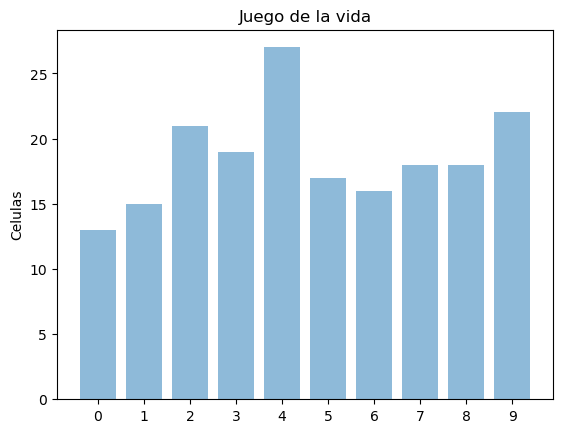

In [2]:
celula = """ ooo.ooo
             o.ooo.o
             o.....o
             """


f = int(input("Ingrese el numero de filas: "))
c = int(input("Ingrese el numero de columnas: "))
tablero = input("Desea que el tablero se infinito (S/N)?")
n = int(input("Ingrese el numero de iteraciones: "))
t = False
if(tablero == 'S' or tablero == 's'):
    t = True
my_game = Game(State(celula, x = 7, y = 3, width = c, height = f), t)
print(my_game.display())
my_game.step(n)

Luego volvemos a ejecutar nuestro código, sin embargo en este caso usamos solamente la mitad del patrón de células establecido en el punto anterior:

Ingrese el numero de filas: 14
Ingrese el numero de columnas: 14
Desea que el tablero se infinito (S/N)?s
Ingrese el numero de iteraciones: 10
 . . . . . . . . . . . . . .
 . . . . . . . . . . . . . .
 . o o o . . . . . . . . . .
 . o . o . . . . . . . . . .
 . o . . . . . . . . . . . .
 . . . . . . . . . . . . . .
 . . . . . . . . . . . . . .
 . . . . . . . . . . . . . .
 . . . . . . . . . . . . . .
 . . . . . . . . . . . . . .
 . . . . . . . . . . . . . .
 . . . . . . . . . . . . . .
 . . . . . . . . . . . . . .
 . . . . . . . . . . . . . .

Generacion: 0
vivas: 6 muertas: 190
 . . . . . . . . . . . . . .
 . . o . . . . . . . . . . .
 . o . o . . . . . . . . . .
 o o . o . . . . . . . . . .
 . . o . . . . . . . . . . .
 . . . . . . . . . . . . . .
 . . . . . . . . . . . . . .
 . . . . . . . . . . . . . .
 . . . . . . . . . . . . . .
 . . . . . . . . . . . . . .
 . . . . . . . . . . . . . .
 . . . . . . . . . . . . . .
 . . . . . . . . . . . . . .
 . . . . . . . . . . . . . .

Celulas

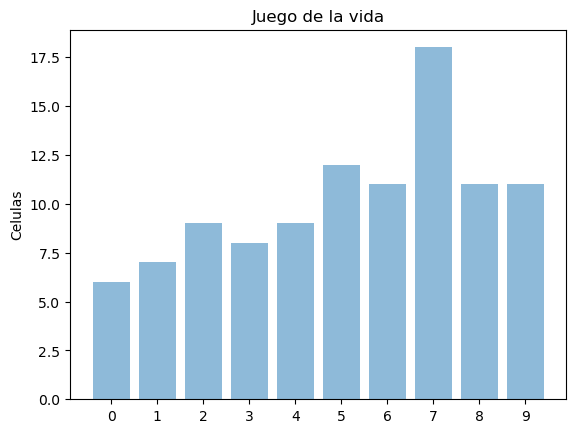

In [3]:
celula = """ ooo
             o.o
             o."""


f = int(input("Ingrese el numero de filas: "))
c = int(input("Ingrese el numero de columnas: "))
tablero = input("Desea que el tablero se infinito (S/N)?")
n = int(input("Ingrese el numero de iteraciones: "))
t = False
if(tablero == 'S' or tablero == 's'):
    t = True
my_game = Game(State(celula, x = 7, y = 3, width = c, height = f), t)
print(my_game.display())
my_game.step(n)

Luego de haber ejecutado nuestro código podemos ver un pequeño resumen en el cual nos enseña la cantidad de generaciones que se generaron, también la cantidad de células que han vivido en cada generación, así como el promedio de células que han vivido y las generaciones que mas células tuvieron y las que menos.<br>

Como podemos apreciar en nuestro programa hay una gran diferencia entre ambos patrones del juego, en el primer patrón que ejecutamos obtuvimos la siguiente salida:<br>

Células por generación: {0: 13, 1: 15, 2: 21, 3: 19, 4: 27, 5: 17, 6: 16, 7: 18, 8: 18, 9: 22}<br>
Total de células que han vivido: 186<br>
Generación con mas células vivas: 4 : 27<br>
Generación con menos células vivas: 0 : 13<br>
Promedio de células vivas por generación: 18.6<br>
Mientras que para el segundo patrón obtuvimos la siguiente salida:<br><br>
Células por generación: {0: 6, 1: 7, 2: 9, 3: 8, 4: 9, 5: 12, 6: 11, 7: 18, 8: 11, 9: 11}<br>
Total de células que han vivido: 102<br>
Generación con mas células vivas: 7 : 18<br>
Generación con menos células vivas: 0 : 6<br>
Promedio de células vivas por generación: 10.2<br>

* Células por generación:<br>

{0: 7,  1: 8,  2: 12, 3: 11, 4: 21, 5: 5,  6: 5,  7: 0,  8: 7,  9: 11}<br>


* Promedio de células vivas por generación:<br>

18.6 – 10.2 = 8.4<br>


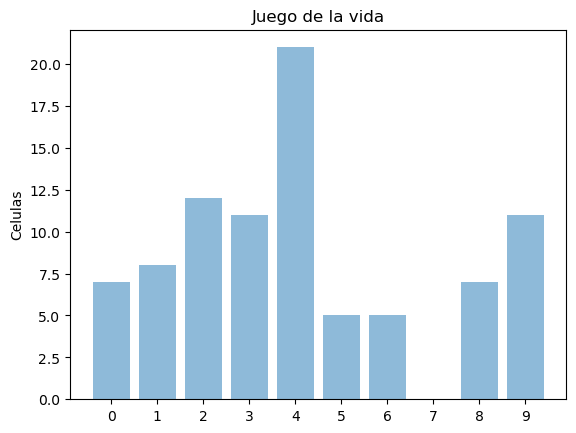

In [4]:
import numpy as np
import matplotlib.pyplot as plt

diff = {0: 7,  1: 8,  2: 12, 3: 11, 4: 21, 5: 5,  6: 5,  7: 0,  8: 7,  9: 11}
generaciones = []
celulas = []

for i in diff:
    generaciones.append(i)
    celulas.append(diff[i])

def graficar(generaciones, celulas):
    objects = generaciones
    y_pos = np.arange(len(objects))
    x_pos = celulas

    plt.bar(y_pos, x_pos, align='center', alpha=0.5)
    plt.xticks(y_pos, objects)
    plt.ylabel('Celulas')
    plt.title('Juego de la vida')
    plt.show()
    

graficar(generaciones, celulas)